In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#questions about importing from sklearn
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

In [2]:
df = pd.read_excel('census data.xlsx')


In [3]:
df["income"] = df["income"].map(lambda x: 1 if (x == ">50K") else 0)

In [4]:
X = df[[col for col in df.columns if col != 'income']]
y = df["income"]

In [5]:
X = pd.get_dummies(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [7]:
#xtra tree
xt_model = ExtraTreesClassifier()
xt_model.fit(X_train, y_train)
result = xt_model.predict(X_test)

In [8]:
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.8393899068481933
0.6717484516436398
0.6157205240174672
0.6425153793574846


<AxesSubplot:>

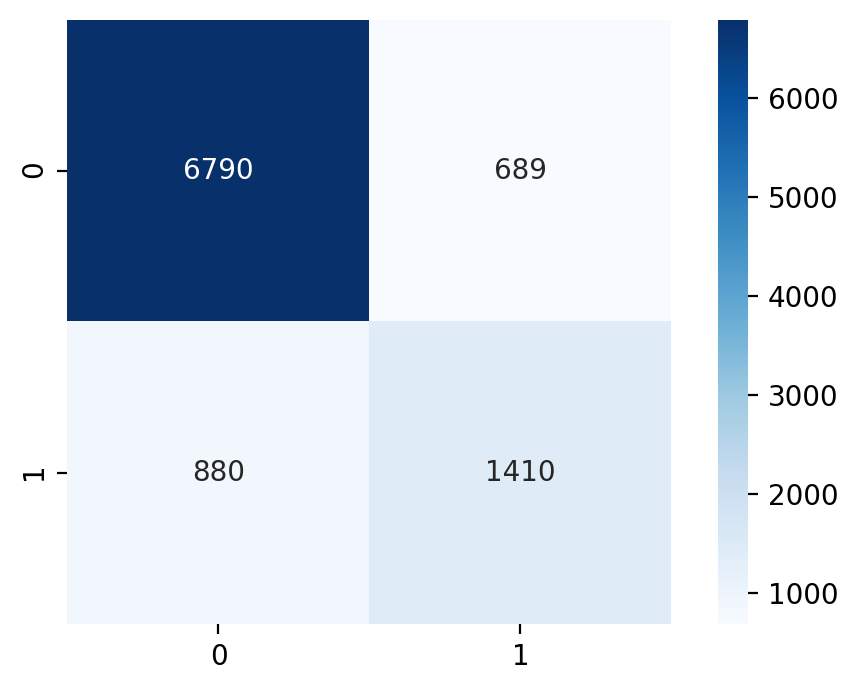

In [9]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [10]:
acc = []
recall = []
precision = []
f1 = []
n = 1

while n < 25:
    xt_model = ExtraTreesClassifier(max_depth =n)
    xt_model.fit(X_train, y_train)
    result = xt_model.predict(X_test)
    acc.append(accuracy_score(y_test,result))
    precision.append(precision_score(y_test,result))
    recall.append(recall_score(y_test,result))
    f1.append(f1_score(y_test,result))
    print(n)
    n = n + 1

/Users/matthew.redmond@usfoods.com/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1


/Users/matthew.redmond@usfoods.com/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


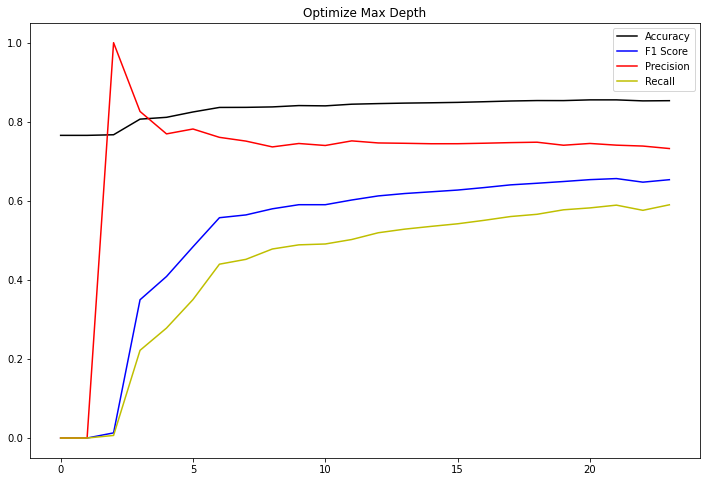

In [11]:
#Took some of this code from Lew's office hour
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(acc, color = 'black', label = 'Accuracy')
ax.plot(f1[-len(acc):], color = 'b', label = 'F1 Score')
ax.plot(precision[-len(acc):], color = 'r', label = 'Precision')
ax.plot(recall[-len(acc):], color = 'y', label = 'Recall')
ax.set_title ("Optimize Max Depth")
ax.legend();
ax.axvline(x=10, ymin=1, color = 'r', ls = ':')

In [12]:
print(acc)
print(precision)
print(recall)
print(f1)

[0.7655850138192241, 0.7655850138192241, 0.7671204831610196, 0.8066332275565564, 0.8112396355819429, 0.8247517657897431, 0.8362166035418159, 0.8364213327873887, 0.8375473436380387, 0.8409253761899887, 0.8402088238304842, 0.8444057733647251, 0.8459412427065206, 0.847169618179957, 0.8479885351622479, 0.8490121813901116, 0.8506500153546934, 0.852492578564848, 0.853618589415498, 0.8535162247927116, 0.8553587880028662, 0.8553587880028662, 0.8527996724332071, 0.8533114955471389]
[0.0, 0.0, 1.0, 0.8260162601626017, 0.7693236714975845, 0.7816764132553606, 0.7605740181268882, 0.7510885341074021, 0.7363819771351715, 0.7450066577896138, 0.7399605003291639, 0.7516339869281046, 0.746390458254865, 0.7455329636475663, 0.7443837279902854, 0.7444511097780444, 0.745712596096984, 0.7472335468841002, 0.7482678983833718, 0.7406162464985995, 0.7451089994410285, 0.7408017572762219, 0.738521836506159, 0.7322493224932249]
[0.0, 0.0, 0.006550218340611353, 0.22183406113537119, 0.2781659388646288, 0.3502183406113